In [1]:
## Let's import necessary python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import time
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Now import the dataset
data_train = pd.read_csv("Dataset/train.csv")
data_test = pd.read_csv("Dataset/Test.csv")
data_val = pd.read_csv("Dataset/Valid.csv")

In [3]:
data_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
data_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
data_val.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


#### After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE

In [6]:
data_train.count()

text     40000
label    40000
dtype: int64

In [7]:
data_test.count()

text     5000
label    5000
dtype: int64

In [8]:
data_val.count()

text     5000
label    5000
dtype: int64

### Data Visualization

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

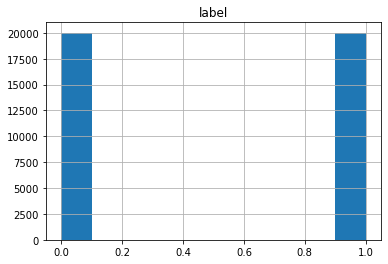

In [9]:
data_train.hist()

#### From the histogram, we found that we have a balanced views, so our dataset is balanced dataset

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

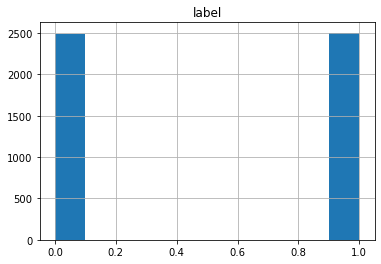

In [10]:
data_test.hist()

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

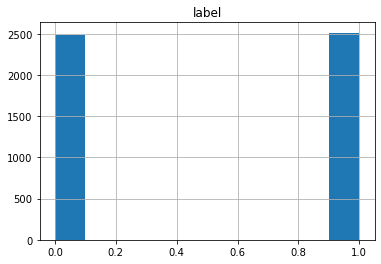

In [11]:
data_val.hist()

In [12]:
def pie_chart_plotter(data_train):
    fig=plt.figure(figsize=(10,10))
    colors=["skyblue",'pink']
    pos=data_train[data_train['label']==1]
    neg=data_train[data_train['label']==0]
    ck=[pos['label'].count(),neg['label'].count()]
    legpie=plt.pie(ck,labels=["Positive","Negative"],
                     autopct ='%1.1f%%', 
                     shadow = True,
                     colors = colors,
                     startangle = 45,
                     explode=(0, 0.1))

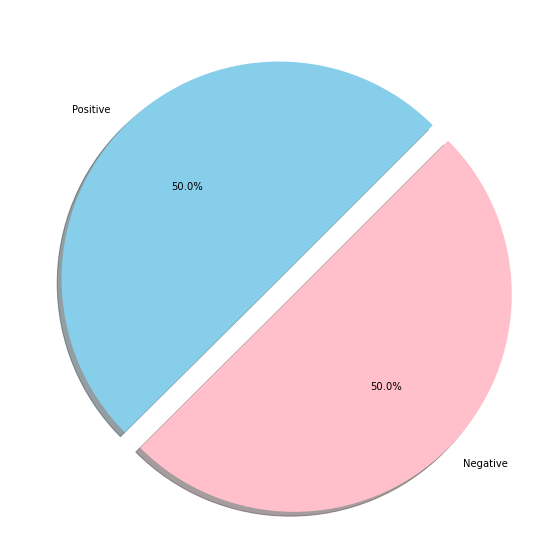

In [13]:
## Let's plot pie chart for train data
pie_chart_plotter(data_train)

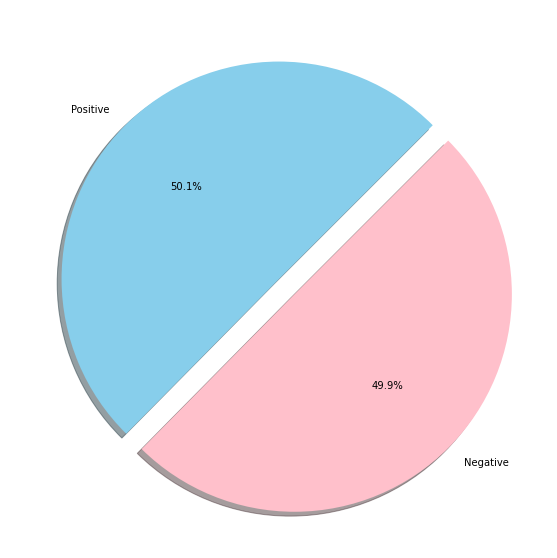

In [14]:
## also let's plot the pie charts for test and validation data
pie_chart_plotter(data_test)

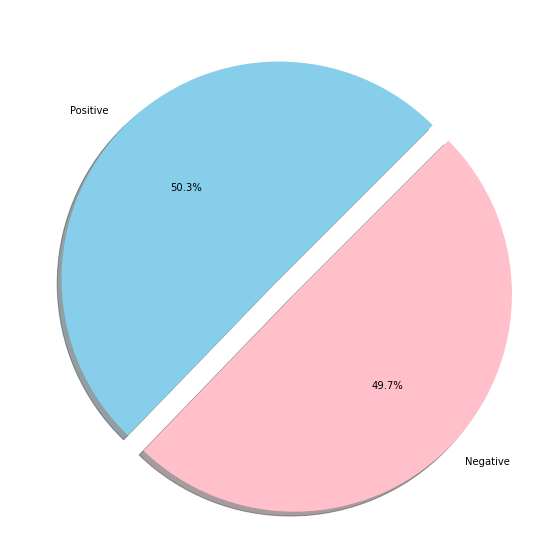

In [15]:
pie_chart_plotter(data_val)

#### Now let's clean our dataset. Remove emijis, html tags and replace it with empty string(spaces)

In [16]:
def preprocessor(text):
     text=re.sub('<[^>]*>','',text)
     emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
     text=re.sub('[\W]+',' ',text.lower()) +\
        ' '.join(emojis).replace('-','')
     return text  


data_train['text']=data_train['text'].apply(preprocessor)
data_test['text'] = data_test['text'].apply(preprocessor)
data_val['text'] = data_val['text'].apply(preprocessor)

In [17]:
data_train["text"][:5]

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [18]:
data_test["text"][:5]

0    i always wrote this series off as being a comp...
1    1st watched 12 7 2002 3 out of 10 dir steve pu...
2    this movie was so poorly written and directed ...
3    the most interesting thing about miryang secre...
4    when i first read about berlin am meer i didn ...
Name: text, dtype: object

In [19]:
data_val["text"][:5]

0    it s been about 14 years since sharon stone aw...
1    someone needed to make a car payment this is t...
2    the guidelines state that a comment must conta...
3    this movie is a muddled mish mash of clichés f...
4    before stan laurel became the smaller half of ...
Name: text, dtype: object

#### Let's tockenize our dataset to remove the word complexities and convert the words into their root word

In [20]:
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
    
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#### Let's remove the unnecessary words i.e. stopwords from the sentiments that will add any value to the dataset to classify into into corresponding labels

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshmali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Let's use wordcloud to visualize positive and negative words from our dataset

In [23]:
## This function will segregate the reviews based on their labels, positive and nagative
def pos_neg_extract(data_train):
    pos_data = data_train[ data_train['label'] == 1]['text']
    neg_data = data_train[data_train['label'] == 0]['text']
    
    return pos_data, neg_data

In [24]:
train_pos_data, train_neg_data = pos_neg_extract(data_train)

In [25]:
def word_cloud_plotter(data_train, color = 'white'):
    words = ' '.join(data_train)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    


Positive words are as follows


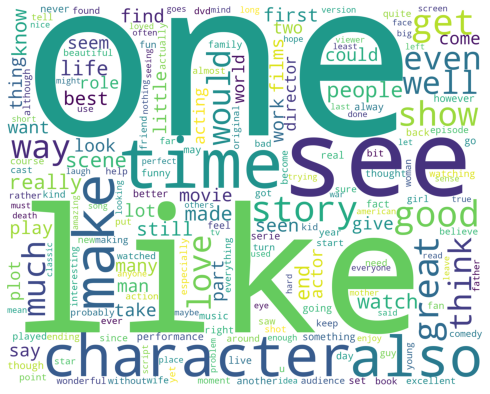

Negative words are as follows


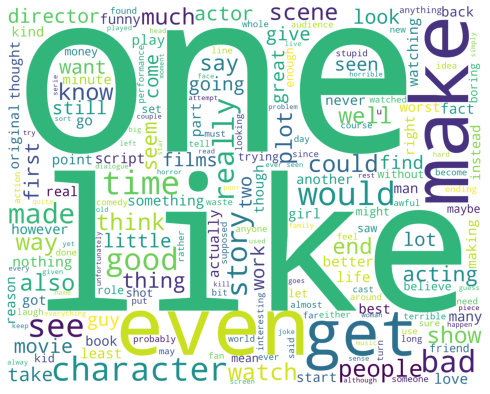

In [26]:
## let's draw wordcloud for train data

print("Positive words are as follows")
word_cloud_plotter(train_pos_data,'white')
print("Negative words are as follows")
word_cloud_plotter(train_neg_data, 'white')

#### The positive words that are highlighted are love, excellent, perfect, good, beautiful, kind, excellent and The negative words that are highlighted are: horrible, wasteful, problem, stupid, horrible, bad, poor.

In [27]:
## Also let's draw wordcloud for test and validation data set

test_pos_data, test_neg_data = pos_neg_extract(data_test)
val_pos_data, val_neg_data = pos_neg_extract(data_val)

Positive words are as follows


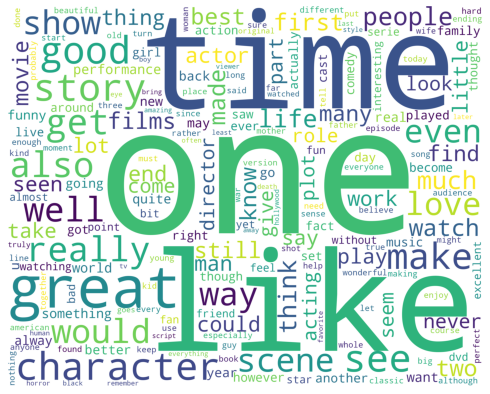

Negative words are as follows


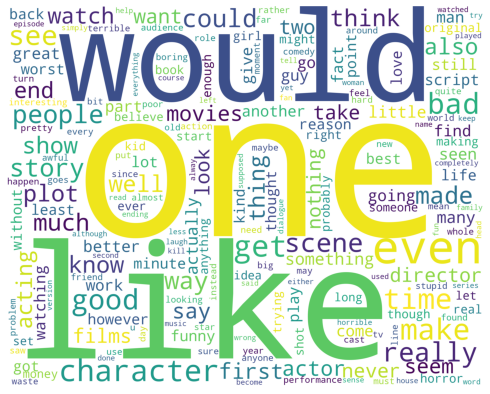

In [28]:
### for test data

print("Positive words are as follows")
word_cloud_plotter(test_pos_data,'white')
print("Negative words are as follows")
word_cloud_plotter(test_neg_data, 'white')

Positive words are as follows


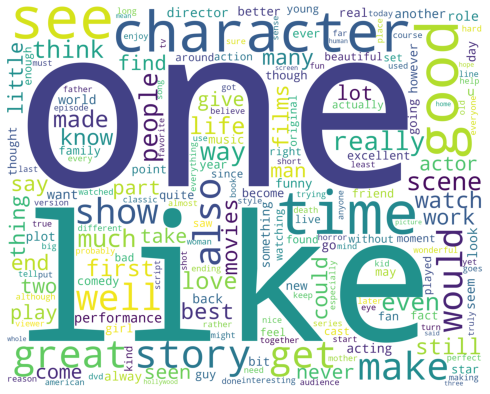

Negative words are as follows


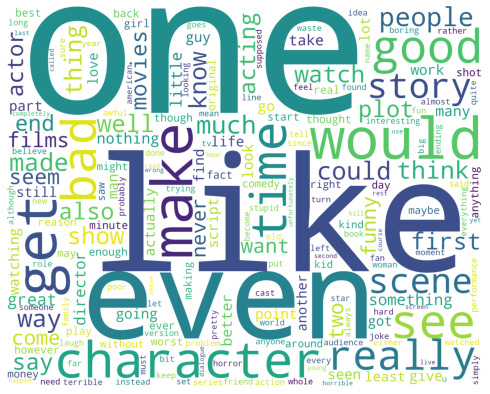

In [29]:
### for validation data

print("Positive words are as follows")
word_cloud_plotter(val_pos_data,'white')
print("Negative words are as follows")
word_cloud_plotter(val_neg_data, 'white')

### Feature Engineering

#### Now we will use the TF-IDF Vertorizer to convert the raw documents into feature matrix which is very important to train a Machine Learning model

In [30]:
def tfidf_vectorizer(data_train,df):
    
    tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
    tfidf.fit(data_train.text)
    vectorized_data = tfidf.transform(df.text)
    return vectorized_data

In [31]:
start_time = time.time()
train_data_tfidf = tfidf_vectorizer(data_train, data_train)
stop_time = time.time()

print('time required: ', stop_time-start_time)
train_label = data_train.label.values

time required:  251.72828888893127


In [32]:
## similarly vectorize test and validation dataset
## note that we dont have to fit_transform again, we just transform our test and val data
start_time = time.time()
test_data_tfidf = tfidf_vectorizer(data_train,data_test)
stop_time = time.time()

print('time required: ', stop_time-start_time)
test_label = data_test.label.values

time required:  141.50347995758057


In [33]:
start_time = time.time()
val_data_tfidf = tfidf_vectorizer(data_train, data_val)
stop_time = time.time()

print('time required: ', stop_time-start_time)
val_label = data_val.label.values

time required:  141.54715585708618


### Training the Machine Learning Model

#### Here we will train LogisticRegressorCV on train_data-tfidf and test it on test_data_tfidf and val_data_tfidf

In [34]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=0,max_iter=500).fit(train_data_tfidf,train_label)
y_pred_test = clf.predict(test_data_tfidf)

### Let's check the accuracy of the model

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_label, y_pred_test))

Accuracy: 0.9028


In [36]:
### Accuracy for validation data
y_pred_val = clf.predict(val_data_tfidf)
print("Accuracy:",metrics.accuracy_score(val_label, y_pred_val))

Accuracy: 0.8966


### So we have achieved accuracy upto 90%, which can be inproved further.

### We can improve the efficiency of the classifier by using advanced feature enginering such as average word2vec, weighted-word2vec, tfidf-weighted-word2vec using glove word embedding.